In [4]:
import json

from src.fillzone import FillzoneState, new_fillzone_game, find_conquered_border
from src.bfs_solver import bfs_solve
from src.dfs_solver import dfs_solve
from src.greedy_solver import greedy_solve
from src.a_star_solver import a_star_solver
from src.heuristics import AdmissibleHeuristics, NonAdmissibleHeuristics
import numpy as np
import matplotlib.pyplot as plt

In [5]:
with open("config.json", "r") as f:
   config = json.load(f)

grid_size = config["grid_size"]
color_count = config["color_count"]

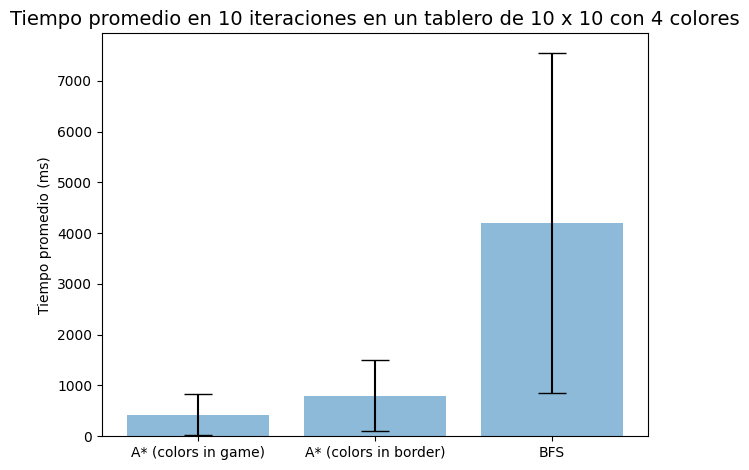

In [6]:
"""
    Este código genera el gráfico correspondiente al tiempo promedio de ejecución de los algoritmos optimos
    El cálculo se hace para una cierta cantidad de iteraciones definido en iters
"""

a_star_times_h1 = []
a_star_times_h2 = []
bfs_times = []

iters = 10

for i in range(iters):

    fz = new_fillzone_game(grid_size, color_count)

    # A* h1
    result = a_star_solver(fz, AdmissibleHeuristics.different_colors_in_game_minus_one)
    a_star_times_h1.append(result.time * 1000)
    # A* h2
    result = a_star_solver(fz, AdmissibleHeuristics.different_colors_in_border)
    a_star_times_h2.append(result.time * 1000)
    # BFS
    result = bfs_solve(fz)
    bfs_times.append(result.time * 1000)

# Calculo de la media y desvío estándar para cada método
a_star_mean_h1 = np.mean(a_star_times_h1)
a_star_mean_h2 = np.mean(a_star_times_h2)
bfs_mean = np.mean(bfs_times)

a_star_std_h1 = np.std(a_star_times_h1)
a_star_std_h2 = np.std(a_star_times_h2)
bfs_std = np.std(bfs_times)

# Lista con los valores de tiempo promedio y desvío estándar para cada método
means = [a_star_mean_h1, a_star_mean_h2, bfs_mean]
stds = [a_star_std_h1, a_star_std_h2, bfs_std]

# Gráfico de barras
fig, ax = plt.subplots()
x_labels = ["A* (colors in game)", "A* (colors in border)", "BFS"]
x_pos = np.arange(len(x_labels))
ax.bar(x_pos, means, yerr=stds, align="center", alpha=0.5, ecolor="black", capsize=10)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.set_ylabel("Tiempo promedio (ms)")
ax.set_ylim(bottom=0)
ax.set_title(f"Tiempo promedio en {iters} iteraciones en un tablero de {grid_size} x {grid_size} con {color_count} colores",
             fontsize=14)
plt.tight_layout()
plt.show()

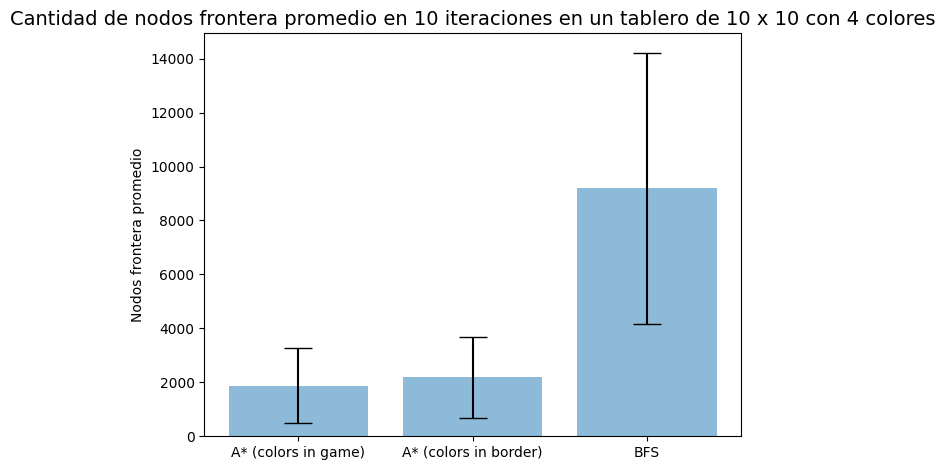

In [7]:
"""
    Este codigo genera el gráfico correspondiente a la cantidad de nodos frontera de los algoritmos optimos
    El cálculo se hace para una cierta cantidad de iteraciones definido en iters
"""

a_star_nodes_h1 = []
a_star_nodes_h2 = []
bfs_nodes = []

iters = 10

for i in range(iters):

    fz = new_fillzone_game(grid_size, color_count)

    # A* h1
    result = a_star_solver(fz, AdmissibleHeuristics.different_colors_in_game_minus_one)
    a_star_nodes_h1.append(result.border_nodes)
    # A* h2
    result = a_star_solver(fz, AdmissibleHeuristics.different_colors_in_border)
    a_star_nodes_h2.append(result.border_nodes)
    # BFS
    result = bfs_solve(fz)
    bfs_nodes.append(result.border_nodes)

# Calculo de la media y desvío estándar para cada método
a_star_mean_h1 = np.mean(a_star_nodes_h1)
a_star_mean_h2 = np.mean(a_star_nodes_h2)
bfs_mean = np.mean(bfs_nodes)

a_star_std_h1 = np.std(a_star_nodes_h1)
a_star_std_h2 = np.std(a_star_nodes_h2)
bfs_std = np.std(bfs_nodes)

# Lista con los valores de tiempo promedio y desvío estándar para cada método
means = [a_star_mean_h1, a_star_mean_h2, bfs_mean]
stds = [a_star_std_h1, a_star_std_h2, bfs_std]

# Gráfico de barras
fig, ax = plt.subplots()
x_labels = ["A* (colors in game)", "A* (colors in border)", "BFS"]
x_pos = np.arange(len(x_labels))
ax.bar(x_pos, means, yerr=stds, align="center", alpha=0.5, ecolor="black", capsize=10)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.set_ylabel("Nodos frontera promedio")
ax.set_ylim(bottom=0)
ax.set_title(f"Cantidad de nodos frontera promedio en {iters} iteraciones "
             f"en un tablero de {grid_size} x {grid_size} con {color_count} colores",
             fontsize=14)
plt.tight_layout()
plt.show()

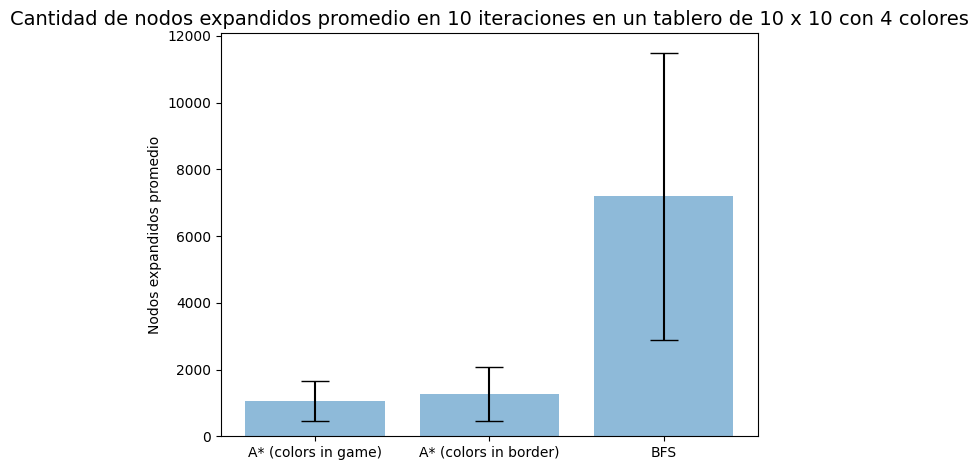

In [8]:
"""
    Este codigo genera el gráfico correspondiente a la cantidad de expandidos por los algoritmos optimos
    El cálculo se hace para una cierta cantidad de iteraciones definido en iters
"""

a_star_nodes_h1 = []
a_star_nodes_h2 = []
bfs_nodes = []

iters = 10

for i in range(iters):

    fz = new_fillzone_game(grid_size, color_count)

    # A* h1
    result = a_star_solver(fz, AdmissibleHeuristics.different_colors_in_game_minus_one)
    a_star_nodes_h1.append(result.nodes_expanded)
    # A* h2
    result = a_star_solver(fz, AdmissibleHeuristics.different_colors_in_border)
    a_star_nodes_h2.append(result.nodes_expanded)
    # BFS
    result = bfs_solve(fz)
    bfs_nodes.append(result.nodes_expanded)

# Calculo de la media y desvío estándar para cada método
a_star_mean_h1 = np.mean(a_star_nodes_h1)
a_star_mean_h2 = np.mean(a_star_nodes_h2)
bfs_mean = np.mean(bfs_nodes)

a_star_std_h1 = np.std(a_star_nodes_h1)
a_star_std_h2 = np.std(a_star_nodes_h2)
bfs_std = np.std(bfs_nodes)

# Lista con los valores de tiempo promedio y desvío estándar para cada método
means = [a_star_mean_h1, a_star_mean_h2, bfs_mean]
stds = [a_star_std_h1, a_star_std_h2, bfs_std]

# Gráfico de barras
fig, ax = plt.subplots()
x_labels = ["A* (colors in game)", "A* (colors in border)", "BFS"]
x_pos = np.arange(len(x_labels))
ax.bar(x_pos, means, yerr=stds, align="center", alpha=0.5, ecolor="black", capsize=10)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.set_ylabel("Nodos expandidos promedio")
ax.set_ylim(bottom=0)
ax.set_title(f"Cantidad de nodos expandidos promedio en {iters} iteraciones "
             f"en un tablero de {grid_size} x {grid_size} con {color_count} colores",
             fontsize=14)
plt.tight_layout()
plt.show()